# **Presentacion**

## **Tecnicatura Universitaria en Inteligencia Artificial**
## Trabajo Práctico Integrador
### ***Aprendizaje Automatico 1***


---

**Equipo**:
- Ferrucci Constantino
- Giampaoli Fabio

<br>

**Fecha**: 13/10/2023 (hasta item 3)

---

## **Resumen**


El dataset elegido consiste de variables meteorologicas de Australia en determinado periodo de tiempo que seran de interes para la predicion y clasificacion de la cantidad y posibilidad de lluvia en algun dia con ciertas caracteristicas mediante modelos estudiados en el cursado de la materia.\
<br>

El dataset cuenta con distintos tipos de varibables (continuas, categoricas, discretas, binarias), muchas de ellas son de utilidad para obtener informacion del climatica del registro (un dia particular), y otras son de utilidad para ubicacion espacio-temporal del registro.\
<br>

En esta primera etapa del trabajo practico, es de principal interes el analisis y tratamiento del conjunto de datos para conocer el contexto sobre el cual vamos a desarrollarnos, y luego realizar predicciones utilizando modelos de regresion lineal con diferentes caracteristicas, y comparar cual tiene mejor comportameinto a la hora de predecir.\
<br>

Es claro que un el modelo por si solo no puede realizar un buen trabajo si el dataset no es preprocesado para maximizar el rendimiento del entrenamiento. Por ello, la primer etapa es el tratamiento primario de los datos, donde se imputan, codifican, suavizan, y estandarizan las variables.\
<br>

Como segunda etapa planteamos el analisis descriptivo de los datos, ya que es de importancia conocer el contexto de los datos e interpretar correctamente como se relacionan las variables entre si.\
<br>

Por ultimo, se realizan las predicciones con los diferentes modelos y se comparan sus rendimientos utilizando metricas de validacion para comprender cual y por que un modelo hace mejor que los demas.

# **Entorno**

En este espacio se establecen las herramientas y recursos a utilizar, se cargan en el entorno para comenzar a procesar.

### Librerias

Se hace uso de distintas librerias de Python que facilitaran herramientas de procesamiento de datos, visualizacion y obtencion de modelo y metricas.

Algunas de estas librerias no han sido utilizadas durante el cursado de la materia, pero son de interes para algunas tareas.

In [ ]:
# procesamiento
import pandas as pd
import numpy as np
import calendar

# visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

# imputacion
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

# Escalado
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Regresiones
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, LassoCV, ElasticNetCV

# Metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Dataset

El dataset es ofrecido por los docentes de la asignatura en formato de csv. Se carga en el entorno y se puede visualizar para comenzar a familiarizarse con el mismo.

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [ ]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# **Tratamiento Primario**


En esta seccion se realizan transformaciones sobre los datos.
Es importante notar que se sigue un enfoque modular. Es decir, todo se realiza mediante transformaciones a traves de funciones que retornan copias modificadas de conjunto de datos original.

De esta manera, es posible descartar o volver hacia atras facilmente cuando una transformacion no resulta de utilidad, o no se decide incluir al conjunto final.

### Filtro

Se establece desde el enunciado que se descarten todos aquellos registros del dataframe original que no pertenzcan al conjunto de ciudades que se piden.

In [ ]:
def filtrar_localidades(df):
    localidades = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport'] # ciudades de interes
    df_filtrado = df[df['Location'].isin(localidades)]
    return df_filtrado

df_filtrado = filtrar_localidades(df)

### Modelo Base

Se establece un modelo de regresion lineal basico. Este sera de gran utilidad para evaluar como cambia al modelo una transformacion del conjunto de datos.

Notar que toma un conjunto de datos y la variable objetivo. El como realiza la regresion es simple, toma todas las variables del dataframe que no tengan nulos ni categorias (para que no se rompa el modelo), separa el conjunto de datos en entrenamiento y validacion, entrena el modelo, lo valida, y retorna una muestra del dataframe que utilizo para entrenar (de utilidad para saber que variables considera), y dos metricas: MSE y R2.

In [ ]:
def base_linear_regression(df, target):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist() # filtra numericas
    numeric_cols.remove(target) # separa la variable objetivo
    df = df.dropna(subset=numeric_cols+[target]) # elimina los nulos
    display(df[numeric_cols].head(1)) # returna una muestra del df

    # Separa, define el modelo, entrena y predice
    X_train, X_test, y_train, y_test = train_test_split(df[numeric_cols], df[target], test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # obtiene las metricas de validacion y las imprime
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R2 score: {r2}")
    print(f"MSE: {mse}")

Aqui podemos hacer una primera prueba del rendimiento del modelo usando los enfonques mas simples sobre el dataframe:
- ignorar los nulos
- descartar las variables categoricas
- sin transformaciones ni estandarizacion de datos

In [ ]:
base_linear_regression(df_filtrado, 'RainfallTomorrow')

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
31159,31168,12.9,20.3,0.2,3.0,10.9,37.0,11.0,26.0,70.0,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8


R2 score: 0.25791819172156705
MSE: 25.126997486181207


Estos valores seran nuestra base para saber si a lo largo de las transformaciones, el dataframe mejora la forma de entrenamiento del modelo o no.

### Reserva


Guardamos en un dataframe aparte solo de aquellos registros que tienen nulos en las dos variables target (por ahora interesa RainfallTomorrow, pero luego tambien sera de utilidad RainTomorrow). En otro, todos los registros que no tengan nulos en las vairbales target.


Esto para dejarnos de reserva los registros del dataframe con nulos en las variables target, por que luego usaramos esta reserva para hacer prediccioens de estas variables con nuetros modelos seleccionados; y por que si tenemos nulos en nuestros target, el modelo no funcionaria. Estimarlos con otro metodo no es de preferencia para este contexto.


In [ ]:
def separar_registros(df):

    df_sin_nulos = df.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])
    df_con_nulos = df[df[['RainTomorrow', 'RainfallTomorrow']].isnull().any(axis=1)]

    df_sin_nulos = df_sin_nulos.reset_index(drop=True)
    df_con_nulos = df_con_nulos.reset_index(drop=True)

    return df_sin_nulos, df_con_nulos

df_entrenamiento, df_reserva = separar_registros(df_filtrado)

In [ ]:
# Lo guardamos para una proxima ocacion
df_reserva.to_csv('weatherAUS_reserved.csv')

### Variables

Tenemos diferentes tipos de variables en este dataframe. Es importante identificarlas, ya que no deben ser tratadas por igual en los procesamientos:

```
continuas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow']
discretas_numericas = ['Cloud9am','Cloud3pm']
numerica_nominal = ['Year']
categoricas = ['Location', 'WindGustDir','WindDir9am','WindDir3pm', 'Season', 'Month']
binarias = ['RainToday', 'RainTomorrow']
```

Notamos que una variable no es de utilidad ya que funciona como un indice del conjunto, asi que las removemos.

Visualizamos que proporcion de valores unicos tiene cada variable

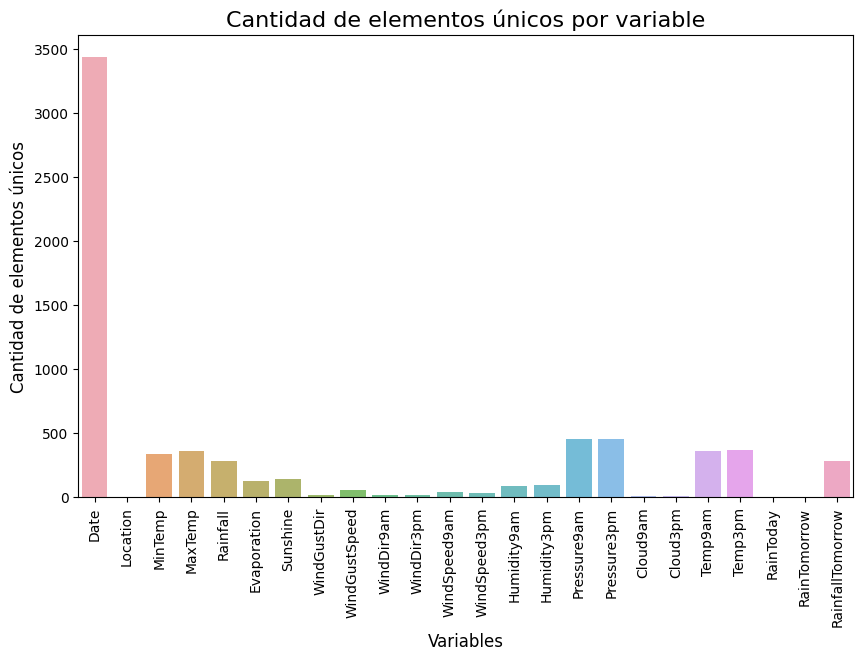

In [ ]:
# sacamos el indice
def remove_index(df):
    df = df.copy()
    if 'Unnamed: 0' in df.columns:
        df_c = df.drop(df[['Unnamed: 0']], axis=1)

    return df_c

def graficar_elementos_unicos(df):
    n_unicos = df.nunique()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=n_unicos.index, y=n_unicos.values, alpha=0.8)

    plt.ylabel('Cantidad de elementos únicos', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.title('Cantidad de elementos únicos por variable', fontsize=16)
    plt.xticks(rotation='vertical')

    plt.show()

df_reseteado = remove_index(df_entrenamiento)
df_reserva_reseteado = remove_index(df_reserva) # tambien lo sacamos de la reserva
graficar_elementos_unicos(df_reseteado)

Notamos que Date posee muchos valores unicos, lo que es natural ya que registramos por dia durante varios años este conjunto de datos.

Tambien notamos gran cantidad de valores unicos en variables continuas.

### Tiempo

En principio, es intuituvo que si interesa conocer como la lluvia actua sobre estas ciudades, el tiempo es importante. Pero como contamos solo con la variable de cada fecha, utilizamos la siguiente funcion para obtener de ella el año, el mes (en forma de string en ingles, para confundir al modelo con una variable ordinal), y la estacion del año de cada registro.

Como se distribuyen las estaciones segun los meses en Australia, fue informacion obtenida de internet.

In [ ]:
def procesar_fecha(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date']) # convierte el tipo

    df['Year'] = df['Date'].dt.year # obtiene el año y mes
    df['Month'] = df['Date'].dt.month
    df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x]) # mapea el numero del mes a su nombre

    conditions = [
        (df['Month'].isin(['December', 'January', 'February'])),  # Verano
        (df['Month'].isin(['March', 'April', 'May'])),            # Otoño
        (df['Month'].isin(['June', 'July', 'August'])),           # Invierno
        (df['Month'].isin(['September', 'October', 'November']))  # Primavera
    ]

    seasons = ['Summer', 'Autumn', 'Winter', 'Spring'] # se agregan las estaciones
    df['Season'] = np.select(conditions, seasons, default='Unknown')

    return df

df_seasons = procesar_fecha(df_reseteado)
df_reserva_seasons = procesar_fecha(df_reserva_reseteado)

Podemos probar como performa el modelo base ahora que se agrega una nueva columna numerica (el año)

In [ ]:
base_linear_regression(df_seasons, 'RainfallTomorrow')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
990,12.9,20.3,0.2,3.0,10.9,37.0,11.0,26.0,70.0,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,2010


R2 score: 0.2491660219409415
MSE: 25.423347222319595


Notamos que el año podria estar afectando negativamente el modelo, pero la mantendremos por ahora por que sera de interes para el analisis descriptivo.

### Nulos

El tratamiento de nulos no es del todo simple.

Este dataset contiene muchos valores nulos en las distintas variables. Podemos notarlo en el sigueinte grafico.

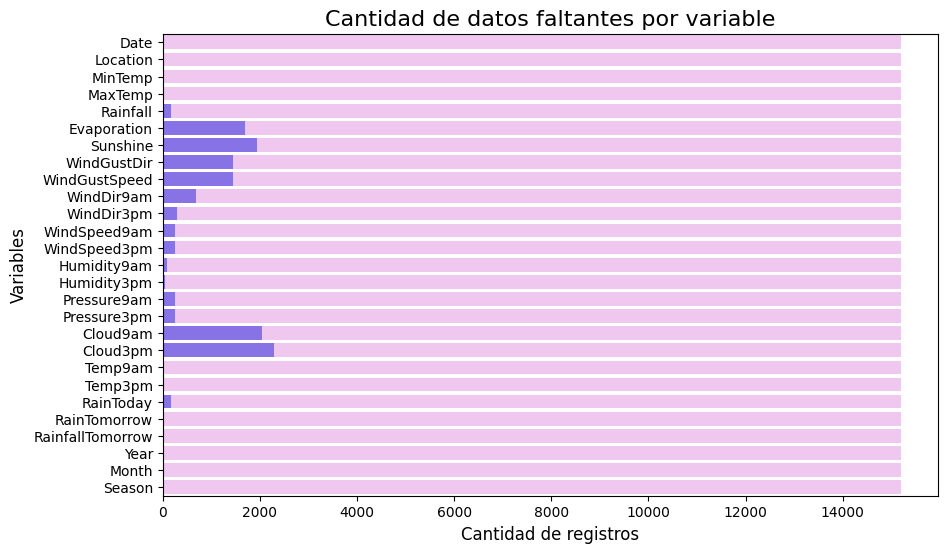

In [ ]:
def graficar_datos_faltantes(df):
    df = df.copy()
    total = df.shape[0]
    nulos = df.isnull().sum()

    df_grafico = pd.DataFrame({'total': total, 'nulos': nulos})

    plt.figure(figsize=(10, 6))
    sns.barplot(y=df_grafico.index, x=df_grafico['total'], color='violet', alpha=0.5)
    sns.barplot(y=df_grafico.index, x=df_grafico['nulos'], color='blue', alpha=0.5)

    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Cantidad de datos faltantes por variable', fontsize=16)

    plt.show()

graficar_datos_faltantes(df_seasons)

Tanto las variables categoricas como numericas contienen valores nulos. Por eso es importante tratarlas de forma diferente.

Separaremos las columnas para realizar imputaciones con diferentes enfoques.

In [ ]:
df_numerical = df_seasons[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow']]
df_categorical = df_seasons[['WindGustDir','WindDir9am','WindDir3pm', 'RainToday', 'Cloud9am', 'Cloud3pm']]

Para imputar las variables numericas, se utilizara un modelo externo al cursado: K-Nearest Neighbours.

Este modelo basicamente realiza estimaciones de valores utilizando una media de los registros que se le parecen.

Es decir, mide la distancia entre el registro que quiere imputar y todos los demas. Aquella cantidad k de registros que consideremos como vecinos cercanos, seran seleccionadas para hacer una media de los valores de la variable que se busca imputar.

De esta manera se logra una imputacion mas contextual de los valores nulos, ya que enfoques mas simples como imputar todos los datos con una media global, o simplemente remover los valores nulos del conjunto, pueden causar gran perida de informacion.

In [ ]:
def impute_knn(df):
    df_copy = df.copy()
    imputer = KNNImputer(n_neighbors=10) # definimos el modelo con 10 vecinos mas cercanos para realizar la estimacion

    df_copy = pd.DataFrame(imputer.fit_transform(df_copy), columns = df_copy.columns) # entrena el modelo e imputa los valores nulos con sus estimaciones
    return df_copy

df_imputed_numeric = impute_knn(df_numerical)

Las varibles categoricas usan otro enfoque. Ya que al tener clases definidas de los datos, un modelo como el anterior puede generar valores a imputar que en realidad no representan una clase.

Por ello, se utiliza un modelo distinto para realizar la imputacion de estas. Notar que las variables 'Cloud3pm' y 'Cloud9am' son numericas, pero que en realidad representan clases (representan el porcentaje de nubocidad como 0.0, 0.1, 0.2, ..., 0.9, pero jamas como 2.34, por ejemplo) por ello se incluyen aqui.

Para abordar este problema, se utiliza un modelo diferente llamado Random Forest para la imputación de variables categóricas. Es una técnica de aprendizaje automático que se utiliza en este contexto para predecir y reemplazar los valores faltantes en las variables categóricas.

El modelo de random forest es entrenado dandole contexto de los datos, en este caso, las vairables numericas procesadas anteriormente. Esto se debe a que el modelo comienza a clasificar las clases en funcion de las caracteristicas del registro.

La siguiente imagen es una representacion visual simplificada de como funciona este modelo:

![random_forest](
https://www.researchgate.net/profile/Ioan_Tudosa/publication/342028855/figure/fig2/AS:900377180372993@1591678056260/Example-of-a-Random-Forest-workflow.ppm)



Este modelo no puede funcionar si las categorias son cadenas de texto.

Por ello utilizaremos momentaneamente una tecnica para codificar las clases. Utilizaremos LabelEncoding, que en escencia, asigna un valor entero a cada clase sobre la misma columa. Por lo que cada entero representa una clase.

Esta tecnica no es de utilidad para el conjunto final debido a la interpretacion que los modelos de regresion lineal le dan a estas clases, por que se reserva un diccionario de los mapeos de las clases, y se define una funcion para luego decodificar las variables nuevamente a su estado de texto.

In [ ]:
def label_encode_categorical(df):
    df_copy = df.copy()
    le_dict = {} # guardamos un registro de que numero mapea a cada clase

    for column in df_copy.columns:
        le = preprocessing.LabelEncoder()
        df_notnull = df_copy[df_copy[column].notnull()]
        df_notnull[column] = le.fit_transform(df_notnull[column]) # codifica la columna

        df_copy.loc[df_copy[column].notnull(), column] = df_notnull[column]
        le_dict[column] = le

    return df_copy, le_dict # retorna el dataframe codificado y el diccionario de mapeos

def decode_categorical(df, le_dict):
    df_decoded = df.copy()

    for column in df_decoded.columns:
        df_decoded[column] = le_dict[column].inverse_transform(list(df_decoded[column])) # como conoce la relacion entre los numeros y las clases, puede realizar la transformacion inversa (numerico a string)

    return df_decoded

In [ ]:
df_non_numeric_conv, le_dict = label_encode_categorical(df_categorical)

<ipython-input-16-08ebc47c3655>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull[column] = le.fit_transform(df_notnull[column]) # codifica la columna
<ipython-input-16-08ebc47c3655>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull[column] = le.fit_transform(df_notnull[column]) # codifica la columna
<ipython-input-16-08ebc47c3655>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Una vez que las clases sean numericas, usamos el modelo de random forest para realizar la imputaciones.

Es importante notar que no solo damos el dataframe a imputar con las clases al modelo, sino tambien el dataframe de valores numericos procesados anteriormente. Esto es de especial importancia ya que el modelo debe conocer el contexto del registro para estimar la categoria a la que pertence.

Notar tambien imputamos una categoria a la vez. Es decir, itera cada columna a imputar, realiza la clasificacion en base al dataframe numerico y las clases de la columna actual de la iteracion, y realiza la imputacion. La columna imputada por el modelo no es utilizada para dar contexto a la proxima columna a imputar.

Cada columna categorica es imputada solo por su contexto numerico, no tiene en cuenta otras columnas. (Esto por facilidad de computo y codificacion de la logica)

In [ ]:
def impute_random_forest(df, df_numns):
    df_complete = pd.DataFrame() # para guardar en otro dataframe las columnas imputadas

    for column in df.columns: # itera las columnas categoricas
        df_copy = df_numns.copy()
        df_copy[column] = df[column]

        df_notnull = df_copy[df_copy[column].notnull()] # utiliza los valores no nulos para entrenamiento
        null_df = df_copy[df_copy.isnull().any(axis=1)]

        clf = RandomForestClassifier(n_estimators=100) # usa 100 estimadores sellecionado como hiperparametro
        clf.fit(df_notnull.drop(column, axis=1), df_notnull[column].astype(int))

        pred = clf.predict(null_df.drop(column, axis=1)) # predice la clase a la que pertenece
        df_copy.loc[df_copy[column].isnull(), column] = pred

        df_complete[column] = df_copy[column] # guarda la columna ya imputada

    return df_complete

In [ ]:
df_imputed_non_numeric = impute_random_forest(df_non_numeric_conv, df_imputed_numeric) # le damos las categoricas codificadas y las numericas para contexto

# ahora debemos decodificar las clases que estan imputadas
df_imputed_categorial_numeric = df_imputed_non_numeric[['Cloud9am', 'Cloud3pm']] # estas se reservan ya que no tiene strings asosiados
df_imputed_categorial_non_numeric = df_imputed_non_numeric[['RainToday', 'WindGustDir','WindDir9am','WindDir3pm']]
df_imputed_non_numeric_decoded = decode_categorical(df_imputed_categorial_non_numeric, le_dict)

Para este punto contamos con tres dataframes.
- Numericos continuos imputados
- Numericos discretos imputados
- categorias imputadas y decodificadas

Ahora resta unirlos nuavamente, y no perder las variables que teniamos anteriormente que no usamos para la imputacion (Date, Year, Location, etc)

In [ ]:
def merge(df, df_list):
    df_copy = df.copy()

    for df_current in df_list: # para pisar las columns del primer dataframe con las transformadas
        for column in df_current.columns:
            df_copy[column] = df_current[column]

    return df_copy

df_imputed = merge(df_seasons, [df_imputed_numeric, df_imputed_categorial_numeric, df_imputed_non_numeric_decoded])

Podemos validar para este punto que el dataframe transformado no posee nulos.

In [ ]:
nulos = df_imputed.isnull().sum()
nulos[nulos > 0]

Series([], dtype: int64)

In [ ]:
## knn 7, stimators 50: R2 score: 0.22951994038295354, MSE: 47.38418894832075
## knn 10, stimators 50: R2 score: 0.2296283711193976, MSE: 47.37752050513479
## knn 10, stimators 100: R2 score: 0.22975870207170224, MSE: 47.36950520818747

base_linear_regression(df_imputed, 'RainfallTomorrow')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,19.5,22.4,15.6,6.2,0.0,44.3,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,2008


R2 score: 0.22973737767491276
MSE: 47.37081664932611


Notamos que las metricas han empeorado con respecto el enfoque mas simple de ignorar los valore nulos en las variables.

Aun asi mantendremos esta version para trabajar con un dataset con mayor cantidad de registros.

### Categoricas


En esta seccion se busca incluir las columnas categoricas en forma de string al modelo. Creemos que el modelo puede enriquecerce al conocer contextualmente las clases de estas variables.

Es decir, incluir a sus variables de entrenamiento informacion como la localidad, la estacion del año, las varibles binarias de si llueve o no dicho dia o el siguiente.

Para ello, la forma de codificar la variables es mediante una codificacion frecuencial. Esto significa que asignara a cada clase un numero que represente la cantidad de sus apariciones a lo largo del conjunto de datos.

De esta manera, se evitan generar muchas columnas nuevas con el enfoque de OneHotEncoding, y el modelo lineal no interpreta directamente una clase mayor que otra a menos que note que tiene mayor influencia en el conjunto.

In [ ]:
def frequency_encode_categorical(df):
    df_copy = df.copy()
    non_nums = df_copy.select_dtypes(include=[object])

    for column in non_nums.columns:
        freq_enc = non_nums[column].value_counts(normalize=True)
        non_nums[column] = non_nums[column].map(freq_enc)

    return non_nums

Las siguientes funciones tienen la intencion de aumentar y reducir variables para mejorar la explicabilidad y simplificar la informacion.

In [ ]:
# agregar las coordenadas de cada localidad
def add_coord(df):
    # en principio solo de interes para analisis descriptivo.
    # los datos fueron tomados de internet
    data = {
        'Location': ['Sydney', 'Canberra', 'Melbourne', 'SydneyAirport', 'MelbourneAirport'],
        'lat': [-33.865143, -35.282001, -37.840935, -33.947346, -37.663712],
        'lon': [151.209900, 149.128998, 144.946457, 151.179428, 144.844788]
    }

    au = pd.DataFrame(data)
    df_merged = df.merge(au[['Location', 'lat', 'lon']], left_on='Location', right_on='Location', how='inner')

    return df_merged

# transformar a numerica las columnas binarias que era 'yes' y 'no'
def a_binario(df):
    df = df.copy()
    mapeo = {'No': 0, 'Yes': 1} # diccionario para realizar el mapeo
    df['RainToday'] = df['RainToday'].replace(mapeo)
    df['RainTomorrow'] = df['RainTomorrow'].replace(mapeo)
    return df

# de interes para simplificar las tantas clases de las direcciones del viento a solo 4
def mapear_direcciones_viento(df):
    df = df.copy()
    mapeo = {
        'NNE': 'N', 'NNW': 'N',
        'NE': 'N', 'NW': 'N',
        'WNW': 'W', 'WSW': 'W',
        'SSE': 'S', 'SSW': 'S',
        'SE': 'S', 'SW': 'S',
        'ENE': 'E', 'ESE': 'E',
    } # usa mapeos predefinidos manualmente

    columnas_viento = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
    for columna in columnas_viento:
        df[columna] = df[columna].replace(mapeo)
    return df

# simplicar las ciudades. Sabemos y notamos por coordenadas, que los aeropuertos de las ciudades son muy cercanos a sus ciudades (de hecho pertecen a ahi), por lo que podriamos simplificar
def mapear_localidades(df):
    df = df.copy()
    mapeo = {'SydneyAirport': 'Sydney',
             'MelbourneAirport': 'Melbourne'} # mapeo manual

    df['Location'] = df['Location'].replace(mapeo)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
df_binario = a_binario(df_imputed) # se mapean las columnas binarias
# df_binario = a_binario(df_seasons) # aqui se prueba codificar el dataframe no imputado para ver si es mejor asi, pero no lo es

df_vientos = mapear_direcciones_viento(df_binario) # se simplifican las dirreciones del viento
df_locations_reduced = mapear_localidades(df_vientos) # se simplifican las localidades
df_locations = add_coord(df_locations_reduced) # se añiaden las coordenadas de las localidades

df_encodes = frequency_encode_categorical(df_locations) # se codifican las variables
df_encoded = merge(df_locations, [df_encodes]) # unir los cambios

Aqui se prueban distintas alternativas de que forma es mas performante el modelo ahora que incluye las variables categoricas.

La simplificacion de las variables no implica perdida significativa de valor, por lo que preservamos este dataframe.

Notamos como el modelo ha mejorado ampliamente luego de inluir informacion de las categorias al dataframe de entrenamiento. (incluso conocer las coordenas le hes de utilidad)

In [ ]:
## Solo a_binario(df_imputed): R2 score: 0.3513582637115146, MSE: 39.89118499359594
## frequency_encode_categorical(a_binario(df_imputed)): R2 score: 0.35597787871881614, MSE: 39.607080677537105
## codificado, con coordenadas, vientos reducidos, binarios, localidades recucidas: R2 score: 0.3568, MSE: 39.5512

base_linear_regression(df_encoded, 'RainfallTomorrow')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season,lat,lon
0,0.417133,19.5,22.4,15.6,6.2,0.0,0.338509,44.3,0.273176,0.34897,...,8.0,20.7,20.9,1,1,2008,0.073031,0.238371,-33.865143,151.2099


R2 score: 0.35669890029232554
MSE: 39.562738163998254


### Suavizados

Una tecnica que puede ser de utilidad para mejorar la interpretabilidad del modelo sobre variables continuas, es la reduccion de variabilidad.

El siguiente grafico es un ejemplo de como se comporta la temperatura maxima de cada localidad a lo largo de un año.

In [ ]:
df_2017 = df_imputed[df_imputed['Year'] == 2017].sort_values(by='Date')

fig = px.line(
    df_2017,
    x='Date',
    y="MaxTemp",
    color="Location",
    hover_name="Location",
)

fig.show()

Podemos notar gran variabilidad de la misma a lo largo de los dias. Esto podria no ser ventajoso para un modelo de prediccion, ya que interesa captar la esencia de las tendencias y patrones, no el detalle exacto de cada valor.

Una forma de reducir esta volatilidad es suavizar estas series de tiempo.

Para ello se utiliza un kernel o ventana que se desliza hacia la derecha, y obtiene una especie de media de los valores, dandole mas peso a los valores cercanos a la iteracion actual (con una campana de gauss).

Notar que por el tamaño del kernel, quedan datos no capturados por la ventana al inicio, por lo que se rellenan con un enfoque simple, de imputarlos con el valor mas proximo (el primer dia que si entra en el rango de la ventana).

In [ ]:
def fwhm2std(fwhm):
    return fwhm / np.sqrt(8 * np.log(2)) # para definir la forma de obtener el kernel

def smooth_data(series, window_size=5): # itera y transforma todo el recorrido sobre la variable a lo largo del periodo de tiempo
    std = fwhm2std(window_size)
    smoothed = series.rolling(window=window_size, win_type='gaussian', center=False).mean(std=std)
    return smoothed.fillna(method='bfill').fillna(method='ffill')

def smooth(df, target): # retorna la variable suavizada en el tiempo
    data = df.sort_values(by='Date')
    smoothed = smooth_data(data[target])

    return smoothed.sort_index()

def plot_smoothed_data(df, split, target, year=2017): # tiene solo fin de visualizacion. filtra un año y muestra como queda suavizada la vairable para el periodo filtrado por localidad.
    fig, ax = plt.subplots(figsize=(15, 6))

    for l in df[split].unique(): # esto es para generar un lineplot por cada localidad
        data = df[df[split] == l]
        data = data[data['Year'] == year] # filtra el año
        data = data.sort_values(by='Date')
        smoothed = smooth_data(data[target]) # aqui la suaviza

        ax.plot(data['Date'], data[target[0]], color='lightgray', alpha=0.5)
        ax.plot(data['Date'], smoothed, label=f'{l}')

    ax.set_xlabel('Dia')
    ax.set_ylabel(f'{target[0]}')
    ax.legend()
    plt.show()

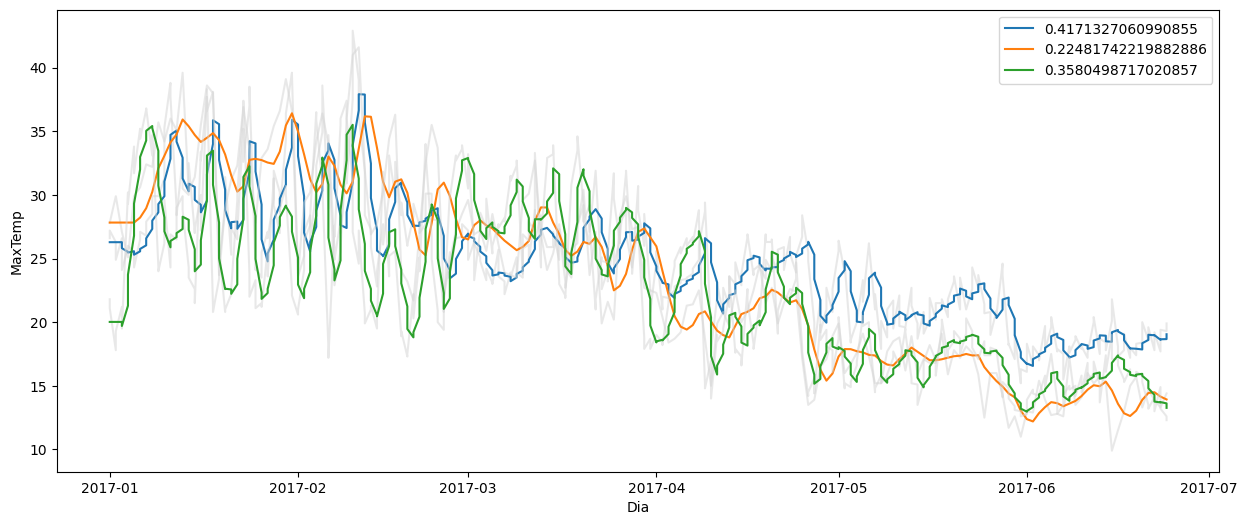

In [ ]:
smoothed = smooth(df_encoded, ['MaxTemp', 'MinTemp'])
df_smooth = merge(df_encoded, [smoothed])

plot_smoothed_data(df_encoded, 'Location', ['MaxTemp'])

De esta manera notamos como reducimos el ruido de estas variables para captar solo las tendencias principales.

Si bien se puede hacer con las demas variables continuas, no demuestran mejoria para el modelo, ya que al parecer pierden informacion util.

En cambio estas dos variables selecioinadas para suavizar, si presentan mejora con respecto a su version 'ruidosa'.

In [ ]:
base_linear_regression(df_smooth, 'RainfallTomorrow')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season,lat,lon
0,0.417133,17.682912,28.591407,15.6,6.2,0.0,0.338509,44.3,0.273176,0.34897,...,8.0,20.7,20.9,1,1,2008,0.073031,0.238371,-33.865143,151.2099


R2 score: 0.35826932258128674
MSE: 39.466157875462585


### Estandarizacion

Esto es de utilidad para conocer las distribuciones de las variables.

Notamos que hay variables con valores muchos mas grandes que otras, pero no por ser valores atipicos, sino por que las variables en si se miden en rangos distintos.

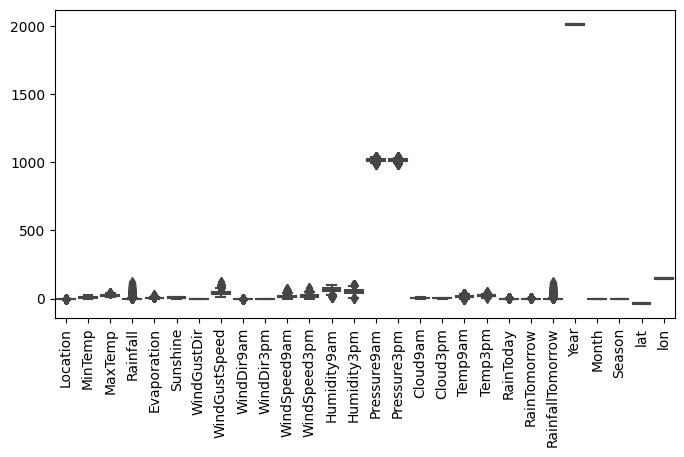

In [ ]:
def show_distrbutions(df):
    plt.figure(figsize=(8, 4))
    sns.boxplot(df)
    plt.xticks(rotation=90)
    plt.show()

show_distrbutions(df_smooth)

Para ellos probaremos y compararamos con diferentes metodos de escalado y estandarizacion, ya que es importante que los datos sean interpretados por los modelos en la misma escala de valores.

Probamos estandarizar las variables, normalizar su rango de 0 a 1, y escalarlas de forma robusta para diminuir la influencia de los valores atipicos de cada variable.

In [ ]:
def estandarize(df):
  data = df.copy()
  scaler = StandardScaler()

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  return data_standardized, scaler #retorno el scaler entrenado para luego desnormalizar las variables si lo necesitara.

def normalize(df):
  data = df.copy()
  scaler = MinMaxScaler()

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  return data_standardized, scaler

def robustize(df):
  data = df.copy()
  scaler = RobustScaler()

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  return data_standardized, scaler

Nos deshacemos de la variable Date ya que no puede ser estandarizada. Ademas no es de utilidad para el modelo ya que casi actua como un identidicador de cada registro.

In [ ]:
def drop_date(df):
    df_nums = df.drop(['Date', 'Year'], axis=1)
    return df_nums

df_nums = drop_date(df_smooth)

No solo visualizamos las distribuciones de las variables transformadas en rango, sino que podemos compararlas en el modelo de regression para ver cual performa mejor.

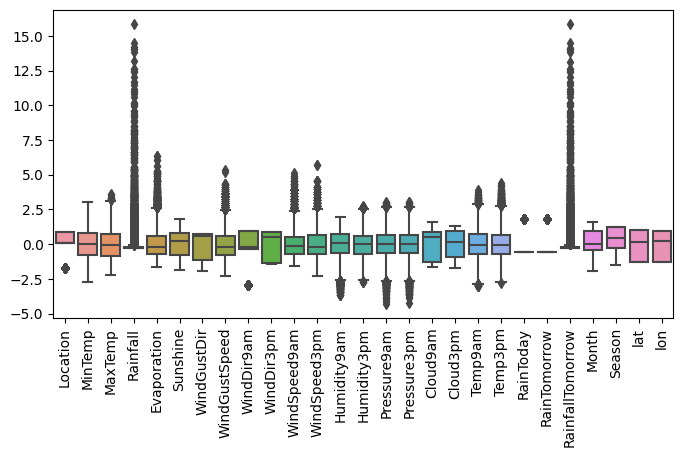

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Season,lat,lon
0,0.874733,1.340073,1.298959,1.801736,0.466504,-1.869996,0.559884,0.019375,-0.334273,0.882858,...,1.205233,1.284419,0.921005,0.108799,1.800549,1.809471,-1.969109,-1.497243,0.993249,0.978462


R2 score: 0.3590575175461441
MSE: 0.7227517115848017


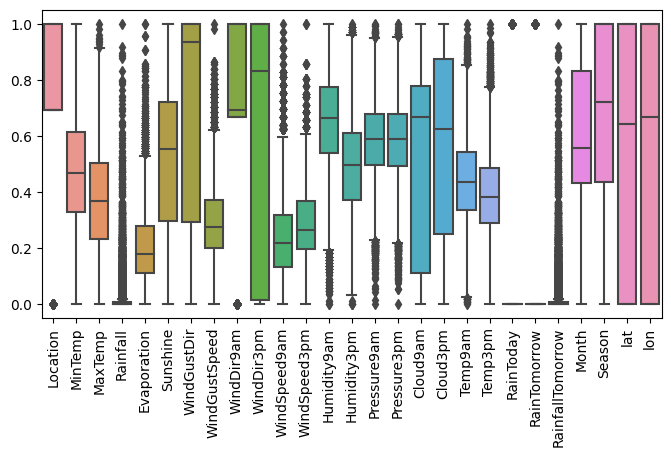

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Season,lat,lon
0,1.0,0.702994,0.599033,0.130653,0.260504,0.0,0.93427,0.3,0.665298,1.0,...,0.888889,1.0,0.571429,0.40566,1.0,1.0,0.0,0.0,1.0,1.0


R2 score: 0.35901092098747855
MSE: 0.0027651202618096697


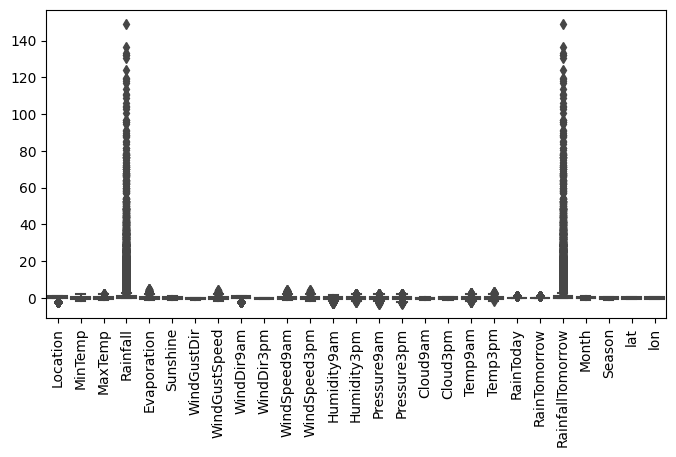

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Season,lat,lon
0,1.0,0.831903,0.846992,19.5,0.5,-1.305085,0.0,0.152632,-0.078115,0.171325,...,0.333333,0.6,0.6625,0.134146,1.0,1.0,-1.396552,-1.275676,0.356371,0.33223


R2 score: 0.359001278155913
MSE: 61.59553582125792


In [ ]:
df_standardized, standar_scaler = estandarize(df_nums)
show_distrbutions(df_standardized)
base_linear_regression(df_standardized, 'RainfallTomorrow')

df_normalized, min_max_scaler = normalize(df_nums)
show_distrbutions(df_normalized)
base_linear_regression(df_normalized, 'RainfallTomorrow')

df_robustized, robust_scaler = robustize(df_nums)
show_distrbutions(df_robustized)
base_linear_regression(df_robustized, 'RainfallTomorrow')

Preferimos la estandirizacion sobre los datos, debido a que presenta mejor interpretabilidad de las variables, y ademas presenta una pequeña ventaja sobre las demas al usar el modelo base de prediccion.

### Dimensionalidad

Esta seccion es solo experimental. La idea es probar que tantas variables son realmente necesarias para que el modelo pueda explicar los datos.

Una tecnica de reduccion de dimensionalidad lineal como lo es el analisis de componentes principales puede ayudarnos a reducir las variables explicativas a menores dimensiones, ya que en escencia explican lo mismo.


columnas de df_normalized: 27


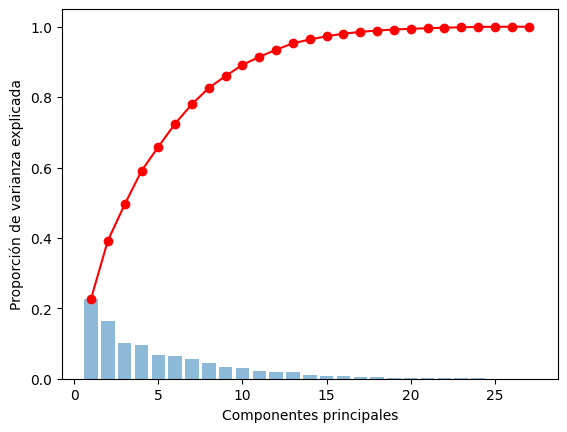

In [ ]:
#--- Obtencion de los componentes ---#
pca = PCA()

pca_result = pca.fit_transform(df_normalized)

pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(df_normalized.columns)]) # genera un df de las componentes

#--- Explicabilidad de los componentes ---#

varianza = np.cumsum(pca.explained_variance_ratio_)

acum = pd.DataFrame({"Component": pca_df.columns,
                     "EigenValues": pca.explained_variance_,
                     "PropVar": pca.explained_variance_ratio_,
                     "VarAcum": varianza}) # aca interesa la varianza acumulada, que se asemeja al porcentaje de explicabilidad de los datos


print(f'columnas de df_normalized: {df_normalized.shape[1]}')

#--- grafico de explicabilidad ---#

plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.plot(range(1, 28), varianza, marker="o" ,color="red")
plt.ylabel("Proporción de varianza explicada")
plt.xlabel("Componentes principales")
plt.show()

Este grafico nos permite visualizar que el dataset puede reducirse a 15 o 20 variables sin perder gran parte de la informacion del dataset, ya que no presenta meyoria significativa si incluimos mas dimensiones reducidas al analisis.

In [ ]:
pcas = pca_df[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15"]]
df_reduced = pd.concat([pcas, df_normalized['RainfallTomorrow']], axis=1)

base_linear_regression(df_reduced, 'RainfallTomorrow')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.065159,1.451345,0.975016,-0.167974,0.23186,0.191836,-0.118193,-0.011826,-0.24962,0.008717,-0.083669,0.115935,-0.204994,-0.039032,0.160578


R2 score: 0.3502922046768001
MSE: 0.002802731353662853


No presenta mejoria alguna reducir la dimensionalidad del dataset, ni tampoco aporta a la explicavilidad de las variables, de hecho se pierde informacion. Por lo que se descarta este analisis para el conjunto final.

# **Analisis Descriptivo**

Esta seccion ya no trata de mejorar el conjunto de datos obtenido. Para este punto, nos quedamos con 'df_normalized' como el conjunto mas optimo para usar con modelos de regresion lineal.

Esta seccion trata de generar interpretabilidad de las variables y descubrir tendencias y patrones visuales en los datos.

Para ello se trabajara con distintas partes del conjunto, algunos que aun no han sido procesados, debido a que son de interes para facilitar la visulizacion. (Ejemplo, para poder ver los nombre de las localidades, en lugar de su representacion numerica)

### Balances

Es de interes conocer las proporciones de clases o valores que presentan nuestros datos. Ya que un dataset balanceado no indica que el modelo podra ser entrenado por igual (con la misma cantidad de datos) para las distantas clases.

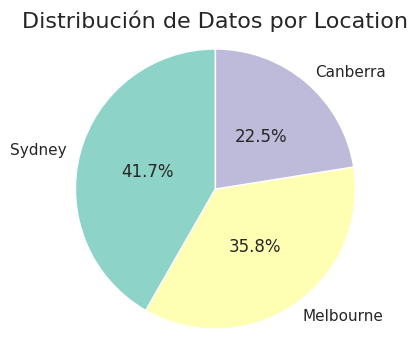

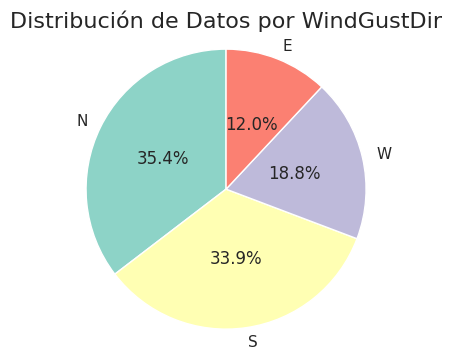

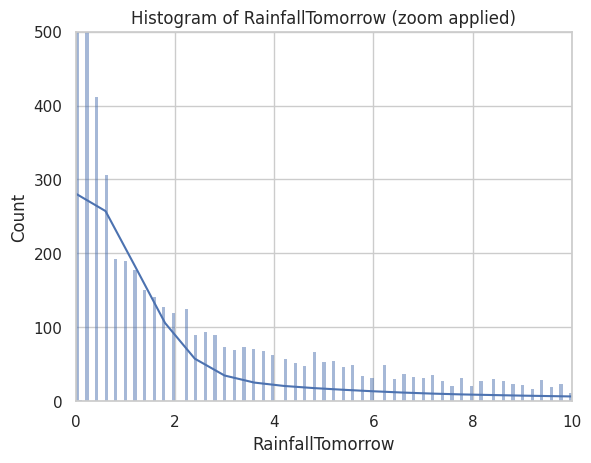

In [ ]:
def graficar_proporcion_datos(df, column):
    value_counts = df[column].value_counts()

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3'))

    plt.title(f'Distribución de Datos por {column}', fontsize=16)
    plt.axis('equal')

    plt.show()

graficar_proporcion_datos(df_locations_reduced, 'Location')
graficar_proporcion_datos(df_vientos, 'WindGustDir')

sns.histplot(data=df_imputed, x='RainfallTomorrow', kde=True)
plt.title('Histogram of RainfallTomorrow (zoom applied)')
plt.xlim(0, 10)
plt.ylim(0, 500)
plt.show()

Notamos que contamos con mas infomacion de Sydney sobre datos meteorologicos que las demas localidades. Que mayormente circulan los vientos en direccion sur en Australia, y que las cantidad de lluvia mas habituales son bajas. Es decir, La mayoria de los registros son de dias no lluviosos.

### Correlaciones


El estudio de las correlaciones lineales de las variables con las demas variables es importante para notar relaciones simples entre los datos

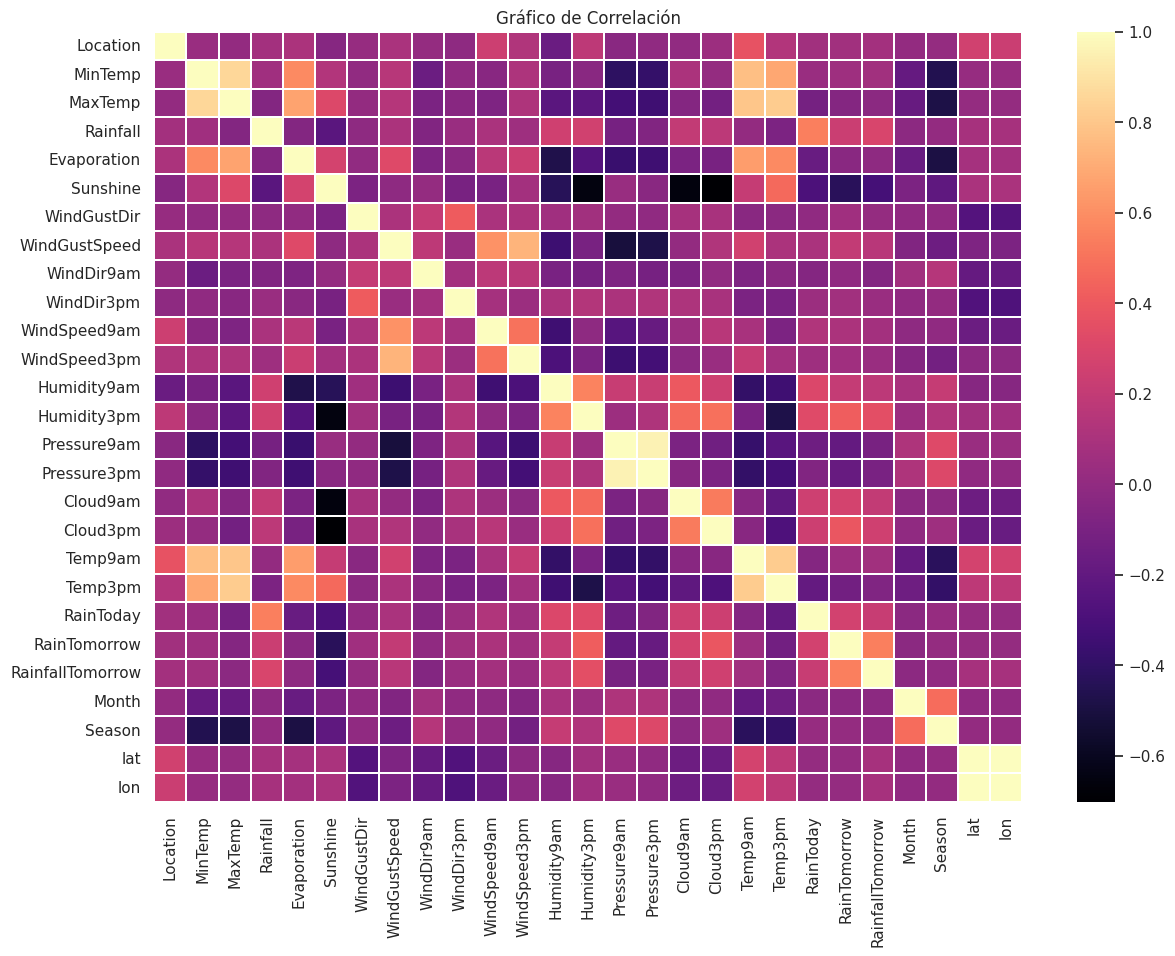

In [ ]:
def graph_corr(df):
  correlation_matrix = df.corr()

  plt.figure(figsize=(14, 10))
  sns.heatmap(correlation_matrix, annot=False, cmap='magma', linewidths=0.3)
  plt.title('Gráfico de Correlación')
  plt.show()

graph_corr(df_standardized)

En este caso, la variable objetivo no tiene mucho relacion lineal con las demas variables, pero notamos cosas interesantes que la intucion ayuda a comprobar:
- Correlaciones negativas entre variables que representan humedad o oscuridad y variables con liminocidad y altas temperaturas
- Relaciones entre las temperaturas con humedad o presion

### Temperatura

Este apartado interesa mostrar de forma grafica y dinamica como ha variado la cantidad de lluvia a lo largo del tiempo para cada localidad.

In [ ]:
def plot_weather_data_for_date(date, df_locations, column):
    # filtra por un dia en particular
    filtered_df = df_locations[df_locations['Date'] == date]

    if len(filtered_df) == 0:
        print("No se encontraron datos para la fecha dada.")
        return

    # filtros de las variable de interes
    locations = filtered_df['Location'] # colors
    vars = filtered_df[column].iloc[0] # sizes
    latitudes = filtered_df['lat'] # y
    longitudes = filtered_df['lon'] # x

    location_colors = {'Sydney': '#FFD700', 'Canberra': '#FF69B4', 'Melbourne': '#87CEEB', 'SydneyAirport': '#FFA07A', 'MelbourneAirport': '#98FB98'}

    plt.figure(figsize=(6, 4))
    for location, lat, lon in zip(locations, latitudes, longitudes):
        plt.scatter(lon, lat, label=location, color=location_colors[location], s=vars*80, alpha=0.7, edgecolors='black')

    plt.title(f"{column} in {date.strftime('%B %Y')}")

    # dejar fijo el tamaño de los ejes
    max_lat, min_lat = -33.5, -38.5
    max_lon, min_lon = 152, 144
    plt.xlim(min_lon, max_lon)
    plt.ylim(min_lat, max_lat)

    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
df_weather = add_coord(df_vientos) # dataframe con label nos codificados y coordenadas

# Crea un rango de fechas desde la fecha mínima a la fecha máxima en df_weather
min_date = df_weather['Date'].min()
max_date = df_weather['Date'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Crea un widget de rango (range picker) para seleccionar una fecha
date_picker = widgets.SelectionSlider(
    options=date_range,
    description='Fecha:',
    continuous_update=False
)

# Utiliza interact para conectar el widget con la función de trazado
def update_plot(date):
    plot_weather_data_for_date(date, df_weather, 'Rainfall')

widgets.interact(update_plot, date=date_picker)

interactive(children=(SelectionSlider(continuous_update=False, description='Fecha:', options=(Timestamp('2007-…

<function __main__.update_plot(date)>

Podemos probar diferentes fechas y variables para visualizar como han variado a lo largo del tiempo.

Por ejemplo, si se selecciona el rango de fechas al primero de junio de 2016, notamos que hubo gran cantidad de lluvia en todas las localidades en comparacion a la demas fechas. (el tamaño de los puntos representa la proporcion de la variable).

Esto nos ayuda a entender que hay casos muy particulares donde hay grandes cantidades de lluvias mas alla de las cantidades habituales.

### Timeseries

Este analisis tiene la intencion de mostrar de forma dinamica en un rango de fechas como ha variado una variable.

Estas funciones hacen uso de suavizadores para facilitar la visualizacion de las lineas de tiempo.

In [ ]:
df_weather_ranges = df_weather.copy() # se reserva para mantener las fechas como date
df_weather_ranges['Date'] = df_weather_ranges['Date'].astype(int) // 10**9 # se conviernte a foramto timestamp para poder selecionarlo como rango en el data picker

# es casi la mismo funcion que la de suaviazdo que utilizamos en el trantamiento primario
def plot_weather_timeseries(df, start_date, end_date, city, variable, window):
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)] # filtra un rango de fechas
    df_filtered = df_filtered[df_filtered['Location'] == city] # filtra una ciudad

    smoothed = smooth_data(df_filtered[variable], window_size=window)

    fig, ax = plt.subplots(figsize=(10, 5))

    # se le da color para reconocer facil que ciuadad analisamos
    location_colors = {'Sydney': '#FFD700', 'Canberra': '#FF69B4', 'Melbourne': '#87CEEB', 'SydneyAirport': '#FFA07A', 'MelbourneAirport': '#98FB98'}

    ax.plot(df_filtered['Date'], df_filtered[variable], color='lightgray', alpha=0.5)
    ax.plot(df_filtered['Date'], smoothed, label=city, color=location_colors[city])

    ax.set_xlabel('Dia')
    ax.set_xticklabels(df_weather['Date'].dt.date, rotation=25)
    ax.set_ylabel(variable)
    ax.legend()
    plt.show()

# define el ragno de fechas extremos
min_date = df_weather_ranges['Date'].min()
max_date = df_weather_ranges['Date'].max()

# selectores de variable
variable_dropdown = widgets.Dropdown(
    options=['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine'],
    description='Variable:',
)

# selector de la localidad
city_dropdown = widgets.Dropdown(
    options=df_weather_ranges['Location'].unique(),
    description='Ciudad:',
)

# crear el range de date
date_range_slider = widgets.IntRangeSlider(
    min=min_date,
    max=max_date,
    description='Date Range:',
    continuous_update=False,
)

# selector del tamaño de la ventana
window_slider = widgets.IntSlider(
    min=1,
    max=100,
    step=1,
    description='Window Size:',
)

# define el widget interactivo
def update_plot(date_range, city, variable, window):
    start_date, end_date = date_range
    plot_weather_timeseries(df_weather_ranges, start_date, end_date, city, variable, window)


widgets.interact(update_plot, date_range=date_range_slider, city=city_dropdown, variable=variable_dropdown, window=window_slider)


interactive(children=(IntRangeSlider(value=(1269972000, 1422165600), continuous_update=False, description='Dat…

<function __main__.update_plot(date_range, city, variable, window)>

Podemos analizar tendencias y patrones de las variables a lo largo del periodo seleccionado. Notar por ejemplo grandes subidas de temperatura o lluvias en ciertos periodos.

En general no se nota gran variabilidad de las variables con respecto a las localidades. Esto es de esperar, ya que las localidades estan relativamente cerca las unas de las otras.

# **Analisis Predictivo**

Una vez que el conjunto de datos fue optimizado (df_normalized) para que los modelos de regression lineal puedan interpretar de mejor manera las variables explicativas del conjunto, y que entendemos que hay variables con mas importancia que otras para tomar en cuenta a la hora de hacer una prediccion de la cantidad de lluvia, podemos realizar el siguiente analsis de predicciones.

### Caracteristicas

Habiamos visto que no muchas de las variables explicativas presentaban buena correlacion lineal con la variable objetivo. Pero podemos probar como se comporta el modelo si filtramos solo por aquellas variables que tengan al menos un score de 0.25 en correlacion con la misma.

In [ ]:
def get_correlation_with_variable(df, column): # para obtener correlaciones con la variable objetivo
  correlation_matrix = df.corrwith(df[column])
  correlation_matrix = correlation_matrix.to_frame(name='correlation')
  correlation_matrix = correlation_matrix.abs()
  sorted_correlation_matrix = correlation_matrix.sort_values(by='correlation', ascending=False)

  return sorted_correlation_matrix

correlation_with_rainfalltomorrow = get_correlation_with_variable(df_normalized, 'RainfallTomorrow')

print('Se observa la correlación absoluta de las variables')
correlation_with_rainfalltomorrow.head(10)

Se observa la correlación absoluta de las variables


,correlation
RainfallTomorrow,1.000000
RainTomorrow,0.546068
Humidity3pm,0.347550
Sunshine,0.316224
Rainfall,0.289088
Cloud3pm,0.253906
RainToday,0.216513
Cloud9am,0.200623
Humidity9am,0.169588
WindGustSpeed,0.157526


In [ ]:
def get_important_variables(df, umbral): # filtrar aquellas variables que superen un umbral de correlacion minima
  df_copy = df.copy()
  df_copy = df_copy[df_copy['correlation'] > umbral]

  variables = df_copy.index

  return list(reversed(variables))

variables_most_important = get_important_variables(correlation_with_rainfalltomorrow, 0.25)
variables_most_important

['Cloud3pm',
 'Rainfall',
 'Sunshine',
 'Humidity3pm',
 'RainTomorrow',
 'RainfallTomorrow']

In [ ]:
df_final = df_normalized[variables_most_important]
df_final.head()

,Cloud3pm,Rainfall,Sunshine,Humidity3pm,RainTomorrow,RainfallTomorrow
0,1.000,0.130653,0.000000,0.835052,1.0,0.050251
1,0.875,0.050251,0.194245,0.721649,1.0,0.055276
2,1.000,0.055276,0.007194,0.855670,1.0,0.157454
3,1.000,0.157454,0.000000,0.896907,1.0,0.648241
4,1.000,0.648241,0.000000,0.731959,1.0,0.013400


In [ ]:
base_linear_regression(df_final, 'RainfallTomorrow') # probamos el modelo base con este dataframe

,Cloud3pm,Rainfall,Sunshine,Humidity3pm,RainTomorrow
0,1.0,0.130653,0.0,0.835052,1.0


R2 score: 0.3340554490857144
MSE: 0.0028727740163867303


El modelo base no presenta mejora con el este conjunto reducido de variables. Por lo que se descarta la idea de seleccion manual de caracteristicas.

### Separacion

Ya decido que df_normalized sera el conjunto de datos final, haremos la sepacion de los conjuntos de entrenamiento y validacion de los modelos.

En este caso usaremos un 80% de los datos para entrenamiento y 20% para hacer la validacion.

In [ ]:
X = df_normalized.drop(columns=['RainfallTomorrow'])
y = df_normalized['RainfallTomorrow']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelos


Vamos a definir de manera conjunta todos los modelos lineales de interes.

Todos ellos son los brindados durante el cursado de la asignatura.
Los parametros fueron ajustados manualmente mediante experimentacion.

In [ ]:
lr = LinearRegression(fit_intercept=False)
sdg = SGDRegressor(max_iter=100000, alpha=0.001, random_state=42, penalty='l2')
l1 = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
l2 = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
elasticnet = ElasticNetCV(alphas=[0.01, 0.1, 1.0], l1_ratio=[0.1, 0.5, 0.9])

### Entrenamiento

La siguiente celda de codigo se utiliza para el entrenamiento de cada modelo.

Notar que se hace el entrenamiento usando el 80% de los datos que reservamos, y declarando cuales son las variables explicativas, y cual la variable explicativa.

In [ ]:
display(lr.fit(X_train, y_train))
display(sdg.fit(X_train, y_train))
display(l1.fit(X_train, y_train))
display(l2.fit(X_train, y_train))
display(elasticnet.fit(X_train, y_train))

LinearRegression(fit_intercept=False)

SGDRegressor(alpha=0.001, max_iter=100000, random_state=42)

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)

ElasticNetCV(alphas=[0.01, 0.1, 1.0], l1_ratio=[0.1, 0.5, 0.9])

### Coeficientes

Las siguientes celdad tienen la intencion de visualizar las coeficientes que asigna cada modelo a cada variable.

Esto con el particular interes de conocer y validar que existen variables mas significativas para realizar la prediccion de la cantidad de lluvia.

In [ ]:
# Crear DataFrames para los coeficientes
coef_lr = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente LR': lr.coef_})
coef_sdg = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente SDG': sdg.coef_})
coef_l1 = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente Lasso': l1.coef_})
coef_l2 = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente Ridge': l2.coef_})
coef_elasticnet = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente ElasticNet': elasticnet.coef_})

# Crear DataFrames con nombres de las variables como índice
coef_lr.set_index('Variable', inplace=True)
coef_sdg.set_index('Variable', inplace=True)
coef_l1.set_index('Variable', inplace=True)
coef_l2.set_index('Variable', inplace=True)
coef_elasticnet.set_index('Variable', inplace=True)

# Concatenar los DataFrames en uno solo
coef_combined = pd.concat([coef_lr, coef_sdg, coef_l1, coef_l2, coef_elasticnet], axis=1)

coef_combined = coef_combined.reset_index()  # Resetear el índice para usar 'Variable' como columna

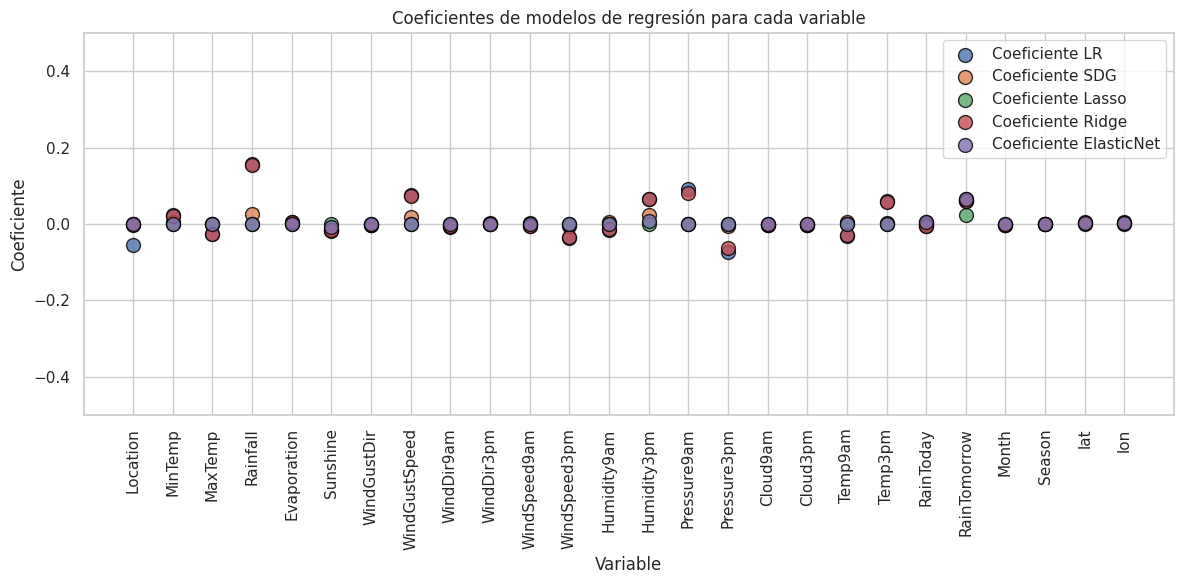

In [ ]:
# Crear un gráfico de puntos para visualizar los coeficientes
plt.figure(figsize=(12, 6))
for model in ['Coeficiente LR', 'Coeficiente SDG', 'Coeficiente Lasso', 'Coeficiente Ridge', 'Coeficiente ElasticNet']:
    plt.scatter(coef_combined['Variable'], coef_combined[model], label=model, alpha=0.8, edgecolors='black', s=100)

plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de modelos de regresión para cada variable')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-0.5, 0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los puntos se superponen entre si. Pero podemos notar rapidamente que Ridge y la Regresion Lineal Multiple asignan mayores pesos que los demas modelos.

Esto tiene sentido ya que los modelo como Lasso o ElasticNet tienden a reducir la importancia de aquellas variables que no significativas para el modelo.

Tambien notamos que en su mayoria, los modelos le dan mayor peso a variables como temperaturas, cantidad o presencia de lluvia en la fecha actual, o la humedad y la presion atmosferica.

### Predicciones

Contamos con la reserva de datos para validacion de los modelos.

La idea es simple: predecimos con los modelos ese 20% de datos que reservamos de variables explicativas.

Es decir, ahora los modelos conocen las relaciones entre las variables, son capaces de realizar prediciones de la cantidad de lluvia, si le pasamos de entrada conjuntos de variables caracteristicas con las que fueron entrenados.

In [ ]:
y_pred_lr = lr.predict(X_val)
y_pred_sdg = sdg.predict(X_val)
y_pred_l1 = l1.predict(X_val)
y_pred_l2 = l2.predict(X_val)
y_pred_elasticnet = elasticnet.predict(X_val)

Las variables generadas son las predicciones obtenidas de cada modelo para las variables caracteristicas de validacion.

### Metricas

En esta ultima seccion, la idea es poder comparar que tan precisas han sido las prediciones de cada modelo con respecto a los datos reales.

Es decir, vamos a comparar con distintas metricas que tan errados fueron las predicciones, ya que aun nos queda una reserva de los datos de validacion, que no son mas que las cantidades de lluvias reales correspondientes al conjunto de variables caracteristicas que se utlizo para las predicciones.

La intencion es generar un dataframe que permita establecer el puntaje de cada modelo para cada tipo de metrica de validacion.

In [ ]:
def get_comparative_models(models, y_val, y_pred):
    # para guardar los scores de cada modelo
    mse_list = []
    rmse_list = []
    mae_list = []
    r2_test_list = []
    r2_train_list = []

    # itera cada modelo para obtener sus metricas
    for i in range(len(models)):
        y_pred_actual = y_pred[i]
        model_actual = models[i]

        mse = mean_squared_error(y_val, y_pred_actual)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred_actual)
        r2 = r2_score(y_val, y_pred_actual)
        r2_train = model_actual.score(X_train, y_train)

        # se guarda los scores del modelo
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_test_list.append(r2)
        r2_train_list.append(r2_train)

    # contruye el dataframe con todas las metricas de los modelos
    df_comparativa = pd.DataFrame({
        'Modelos': ['Regresión Lineal', 'Descenso Del Gradiente Estocástico', 'Regresión Lineal Lasso', 'Regresión Lineal Ridge', 'Regresión Lineal Elasticnet'],
        'MSE': mse_list,
        'RMSE': rmse_list,
        'MAE': mae_list,
        'R2 Test': r2_test_list,
        'R2 Train': r2_train_list
    })

    return df_comparativa


# le damos los modelos y las predicciones de cada uno
models_list = [lr, sdg, l1, l2, elasticnet]
y_pred_list = [y_pred_lr, y_pred_sdg, y_pred_l1, y_pred_l2, y_pred_elasticnet]

df_comparativa = get_comparative_models(models_list, y_val ,y_pred_list)
df_comparativa

,Modelos,MSE,RMSE,MAE,R2 Test,R2 Train
0,Regresión Lineal,0.002765,0.052585,0.021551,0.359002,0.357358
1,Descenso Del Gradiente Estocástico,0.002850,0.053390,0.021190,0.339222,0.331280
2,Regresión Lineal Lasso,0.003717,0.060964,0.025060,0.138451,0.145943
3,Regresión Lineal Ridge,0.002766,0.052588,0.021474,0.358919,0.357298
4,Regresión Lineal Elasticnet,0.002965,0.054454,0.018632,0.312613,0.308998


Si bien podemos comparar directamente los valores aqui, podemos hacere una visualizacion para determianr rapidamente la performance de cada modelo

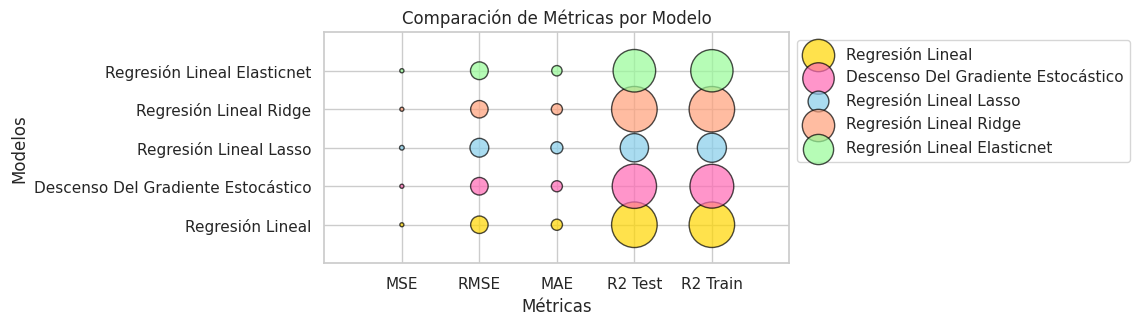

In [ ]:
# Reorganiza el DataFrame para que las métricas sean columnas y los modelos sean el índice
df_comparativa = get_comparative_models(models_list, y_val ,y_pred_list)
df_comparativa.set_index('Modelos', inplace=True)
df_comparativa = df_comparativa.T

fig, ax = plt.subplots(figsize=(6, 3))

# Colores para cada modelo
colors = ['#FFD700', '#FF69B4', '#87CEEB', '#FFA07A', '#98FB98']

# hace el scatter en sus correspondientes posiciones
for i, modelo in enumerate(df_comparativa.columns):
    ax.scatter(df_comparativa.index, [modelo] * len(df_comparativa.index),
               s=df_comparativa[modelo] * 3000, label=modelo, color=colors[i], alpha=0.7, edgecolors='black')

ax.set_xlabel('Métricas')
ax.set_ylabel('Modelos')
ax.set_title('Comparación de Métricas por Modelo')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(-1, 5)
plt.xlim(-1, 5)
plt.xticks()
plt.show()

Podemos notar rapidamente que la regresion de Lasso es la peor. Esto lo podemos intuir, ya que como  habiamos probado, seleccionar solo las caracteristicas mejor relacionadas no era un buen enfoque.

Las mejores prediciones las logran los modelos Rigde y la Regresion lineal multiple. Y de hecho, en los numeros (del data frame) notamos que la mejor es solo la Regresion Lineal la que obtiene el mayor valor de explicabilidad de los datos (el R2 de 0.3576).

Los errores en cambio, el desempeño varia entre los modelos. Aun asi la regresion lineal obtiene el menor error cuadratico medio.

In [ ]:
def evaluate_regression_model(model, color, obs, preds):
    fig = plt.figure(figsize=(10, 5))
    ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax1 = plt.subplot2grid((2, 3), (0, 2))
    ax2 = plt.subplot2grid((2, 3), (1, 2))

    residuos = obs - preds

    ax0.scatter(obs, preds, color=color, alpha=0.75, edgecolor="black")
    ax0.plot([obs.min(), obs.max()], [obs.min(), obs.max()], 'k--', lw=2)
    ax0.set_xlabel("Observaciones reales")
    ax0.set_ylabel("Predicciones")
    ax0.set_title(f"Predicciones del modelo {model}")

    ax1.hist(residuos, bins=30, color=color)
    ax1.set_title(f"Histograma de residuos")

    ax2.scatter(preds, residuos, color=color, alpha=0.4, edgecolors='gray')
    ax2.axhline(y=residuos.mean(), color='black', linestyle='--')
    ax2.set_xlabel("Predicciones")
    ax2.set_ylabel("Residuos")
    ax2.set_title(f"Distribución de residuos")

    plt.tight_layout()
    plt.show()

modelos = ['Regresión Lineal', 'Descenso Del Gradiente Estocástico', 'Regresión Lineal Lasso', 'Regresión Lineal Ridge', 'Regresión Lineal Elasticnet']
colors = ['#FFD700', '#FF69B4', '#87CEEB', '#FFA07A', '#98FB98']
predicciones = [y_pred_lr, y_pred_sdg, y_pred_l1, y_pred_l2, y_pred_elasticnet]

# Crea un widget interactivo para seleccionar el modelo
@interact
def select_model(Modelo=modelos):
    idx = modelos.index(Modelo)
    evaluate_regression_model(Modelo, colors[idx], y_val, predicciones[idx])


interactive(children=(Dropdown(description='Modelo', options=('Regresión Lineal', 'Descenso Del Gradiente Esto…

El gráfico de dispersión de las predicciones frente a las observaciones te permite ver cómo se comparan las predicciones del modelo con los valores reales. Idealmente, las predicciones deberian estar cerca de la línea diagonal, lo que indicaría que las predicciones son precisas. Para los modelos lineales elejidos, no es asi, todos ellos tieden en gran medida a subestimar las cantidades de lluvia del dia siguiente. Ya que para observaciones reales de lluvia de 0.8 (valor normalizado), los modelos retornan precciones de 0.2, por ejemplo.

El histograma de los residuos muestra la distribución de los errores de predicción. Idealmente, los residuos deberian estar distribuidos normalmente y centrados alrededor de cero. En estos modelos, los residuos tienen una forma sesgada o una larga cola, indicando que los modelos está sistemáticamente subestimando los valores.

El gráfico de dispersión de los residuos frente a las predicciones permite ver si hay algún patrón en los errores de predicción. Idealmente, no se deberia ver ningún patrón en este gráfico. En estos modelo notamos patrones, indicando que los modelo está funcionando bien en algunas partes del espacio de características pero no en otras.

# **Conclusiones**

Las metricas de los modelos en general no se podria considerar muy buenas, ya que un R2 de 0.35 representa una baja explicabilidad de los datos para el modelo. Y los graficos de residuos y predicciones no son muy buenos.

Aun asi, este es el mayor puntaje obtenido, por lo que tenemos preferencia sobre el modelo de regresion lineal para realizar predicciones de la cantidad de lluvia para este conjunto de datos en particular, para esta consigna en particular.

Si bien el redimiento de las predicciones podria mejorarse a traves de modelos no lineales mas complejos o con modelos de enfoque conexionista, por el momento, nos limitamos a la predicciones como modelos de regresion lineal.



In [ ]:
df_normalized

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month,Season,lat,lon
0,1.000000,0.702994,0.599033,0.130653,0.260504,0.000000,0.93427,0.300000,0.665298,1.000000,...,1.000,0.571429,0.405660,1.0,1.0,0.050251,0.000000,0.000000,1.0,1.0
1,1.000000,0.714654,0.527430,0.050251,0.142857,0.194245,0.00000,0.235135,0.691443,0.000000,...,0.875,0.615584,0.497642,1.0,1.0,0.055276,0.000000,0.000000,1.0,1.0
2,1.000000,0.725457,0.486185,0.055276,0.100840,0.007194,1.00000,0.266667,0.000000,0.000000,...,1.000,0.644156,0.455189,1.0,1.0,0.157454,0.000000,0.000000,1.0,1.0
3,1.000000,0.733259,0.505852,0.157454,0.092437,0.000000,0.93427,0.408108,1.000000,0.000000,...,1.000,0.589610,0.405660,1.0,1.0,0.648241,0.000000,0.000000,1.0,1.0
4,1.000000,0.732269,0.458073,0.648241,0.218487,0.000000,1.00000,0.275676,1.000000,0.012545,...,1.000,0.618182,0.514151,1.0,1.0,0.013400,0.000000,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,0.692781,0.251174,0.202031,0.000000,0.100840,0.633094,1.00000,0.252252,1.000000,0.830824,...,0.875,0.238961,0.280660,0.0,0.0,0.005025,0.704467,0.719512,0.0,0.0
15195,0.692781,0.256116,0.185821,0.005025,0.025210,0.000000,1.00000,0.117117,0.691443,1.000000,...,0.875,0.324675,0.212264,0.0,0.0,0.001675,0.704467,0.719512,0.0,0.0
15196,0.692781,0.245118,0.200161,0.001675,0.025210,0.000000,1.00000,0.117117,1.000000,0.830824,...,0.875,0.228571,0.231132,0.0,0.0,0.000000,0.704467,0.719512,0.0,0.0
15197,0.692781,0.203886,0.190592,0.000000,0.067227,0.431655,1.00000,0.297297,1.000000,0.830824,...,0.875,0.270130,0.207547,0.0,1.0,0.011725,0.704467,0.719512,0.0,0.0


In [ ]:
def denormalize_df(df, scaler):
    df_copy = df.copy()
    inversed = scaler.inverse_transform(df_copy)
    df_inversed = pd.DataFrame(inversed, columns=df_copy.columns)
    df_inversed['RainToday'] = df['RainToday']
    df_inversed['RainTomorrow'] = df['RainTomorrow']

    return df_inversed

df_denormalized = denormalize_df(df_normalized, standar_scaler)
df_denormalized.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month,Season,lat,lon
0,0.426354,14.795156,24.925108,3.270007,5.586685,7.000102,0.371301,48.383105,0.351413,0.358342,...,7.241044,18.752999,22.639241,1.0,1.0,2.673692,0.083691,0.250254,-33.853302,151.269564
1,0.426354,14.848012,24.550043,2.676765,5.236419,7.727233,0.289469,47.439317,0.353460,0.278336,...,6.907489,18.998930,23.178137,1.0,1.0,2.710802,0.083691,0.250254,-33.853302,151.269564
2,0.426354,14.896979,24.333995,2.713843,5.111324,7.027033,0.377059,47.898103,0.299340,0.278336,...,7.241044,19.158061,22.929416,1.0,1.0,3.465384,0.083691,0.250254,-33.853302,151.269564
3,0.426354,14.932345,24.437016,3.467755,5.086305,7.000102,0.371301,49.956084,0.377611,0.278336,...,7.241044,18.854265,22.639241,1.0,1.0,7.089852,0.083691,0.250254,-33.853302,151.269564
4,0.426354,14.927856,24.186741,7.089003,5.461590,7.000102,0.377059,48.029184,0.377611,0.279339,...,7.241044,19.013396,23.274862,1.0,1.0,2.401547,0.083691,0.250254,-33.853302,151.269564


In [ ]:
# Me guardo el dataset limpio para posterior uso
df_normalized.to_csv('weatherAUS_cleaned.csv')
df_denormalized.to_csv('weatherAUS_desnormalized_cleaned.csv')